# Laboratorium 10 - Zastosowanie DFT

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.fft import fft
from mpl_toolkits.mplot3d import Axes3D

## Obraz z tekstem

Wczytanie tekstu oraz wzorca. Nastąpiło odwrócenie kolorów, aby zapobiec znaczenia szumu (czarny kolor to wartości 0).

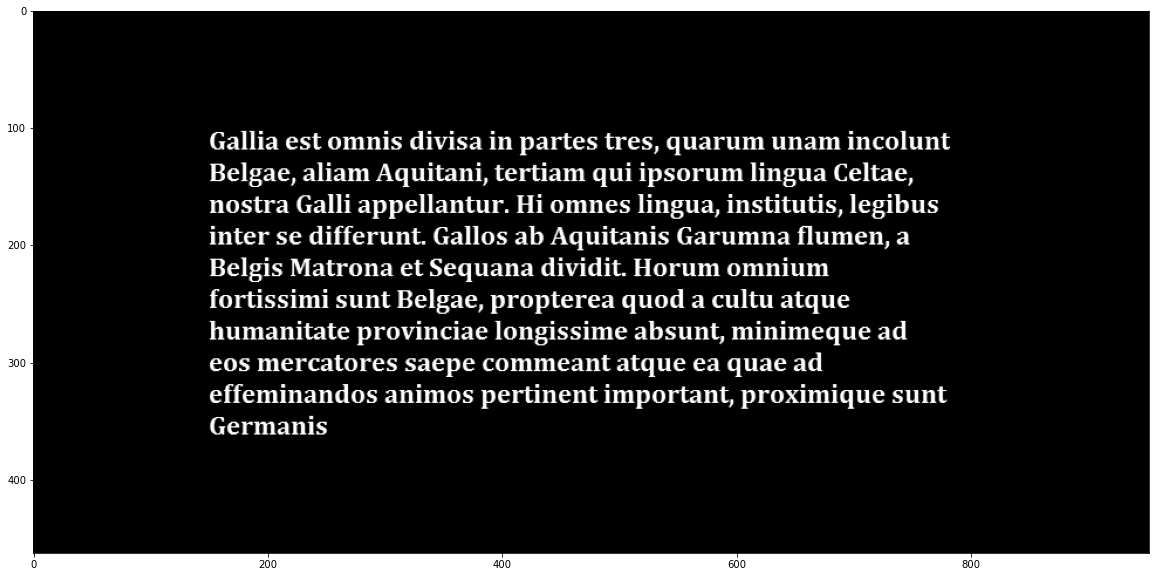

In [2]:
img = Image.open("galia.png").convert("L")
galia = 255 - np.asarray(img)
plt.figure (figsize=(20, 20))
plt.imshow(galia, cmap='gray', vmin = 0, vmax = 255)
plt.show()

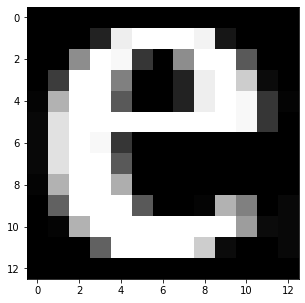

[[  0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  34 238 255 255 255 243  22   0   0   0]
 [  0   0 141 255 248  54   0 141 255 255  89   0   0]
 [  0  60 255 255 128   0   0  34 238 255 205  11   0]
 [  4 178 255 255  89   0   0  34 238 255 248  54   4]
 [  8 225 255 255 255 255 255 255 255 255 248  54   0]
 [  8 225 255 248  54   0   0   0   0   0   0   0   0]
 [  8 225 255 255  89   0   0   0   0   0   0   0   0]
 [  4 178 255 255 174   0   0   0   0   0   0   0   0]
 [  0  98 255 255 255  89   0   0   4 178 128   0   8]
 [  0   4 178 255 255 255 255 255 255 255 157  11   8]
 [  0   0   0  98 255 255 255 255 205  11   0   0   8]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0]]


In [3]:
img = Image.open("galia_e.png").convert("L")
pattern = 255 - np.asarray(img)
plt.figure (figsize=(5, 5))
plt.imshow(pattern, cmap='gray', vmin = 0, vmax = 255)
plt.show()
np.set_printoptions(threshold=np.inf)
print (pattern)

Obliczanie transformaty Fouriera. Korzystam z funkcji bibliotecznych. Następnie zgodnie ze wzorem ze skryptu obliczam korelację i macierz C gdzie w maksima oznaczają wykrycie wzorca. Wykonuje wykres macierzy w której szukamy maksima. Tworzę również obraz fazy oraz logarytmu modułu (logarytm aby obraz nie był cały czarny) dla transformaty obrazu. Niestety nie potrafię z nich odczytać nic ciekawego.

In [4]:
fft_pattern = np.fft.fft2(np.rot90(pattern, 2), s=galia.shape)
fft_galia = np.fft.fft2(galia)
res = np.fft.ifft2(np.multiply(fft_galia, fft_pattern))
C = np.real(res)

In [5]:
module = np.sqrt (np.real(fft_galia)**2 + np.imag(fft_galia)**2)
faza = np.arctan(np.imag(fft_galia) / np.real(fft_galia))

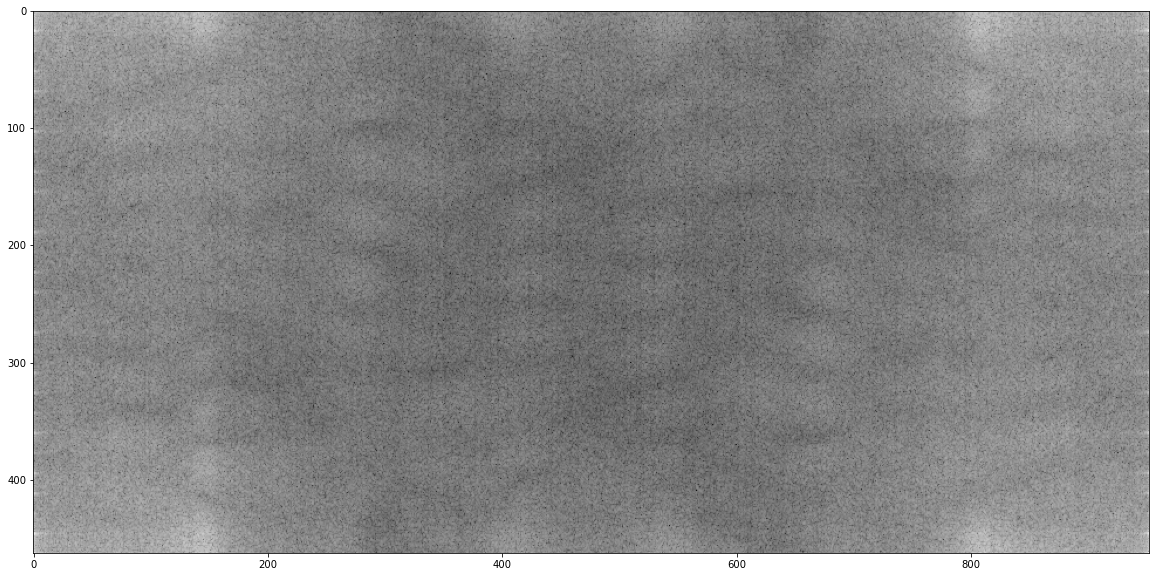

In [6]:
plt.figure (figsize=(20, 20))
plt.imshow(np.log(module), cmap='gray')
plt.show()

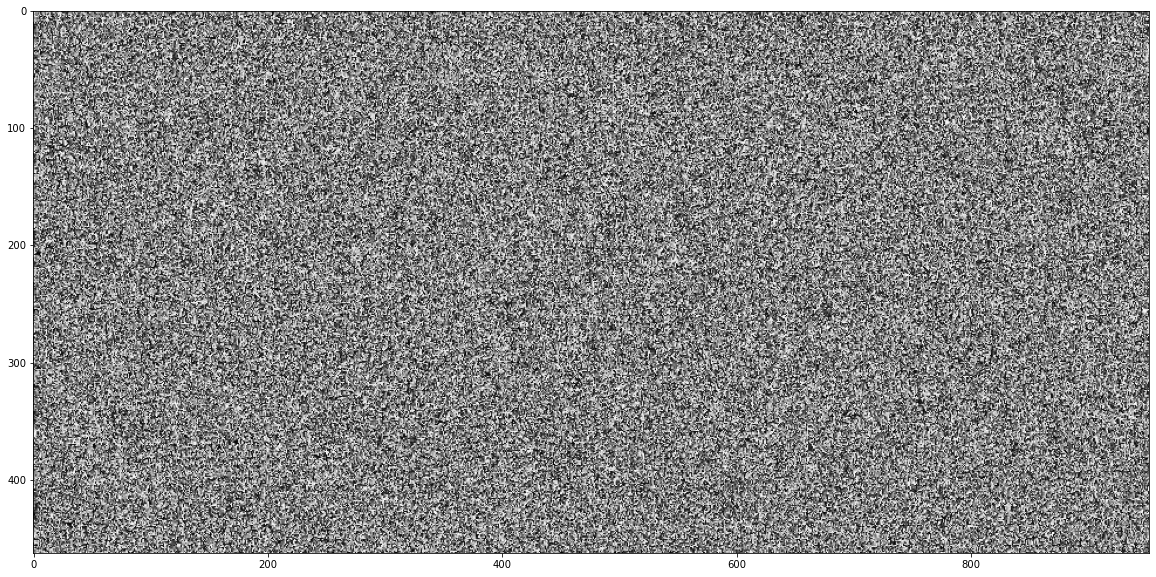

In [7]:
plt.figure (figsize=(20, 20))
plt.imshow(faza, cmap='gray')
plt.show()

In [8]:
X = np.outer(np.arange(C.shape[0]), np.ones(C.shape[1]))
Y = np.outer(np.ones(C.shape[0]), np.arange(C.shape[1]))

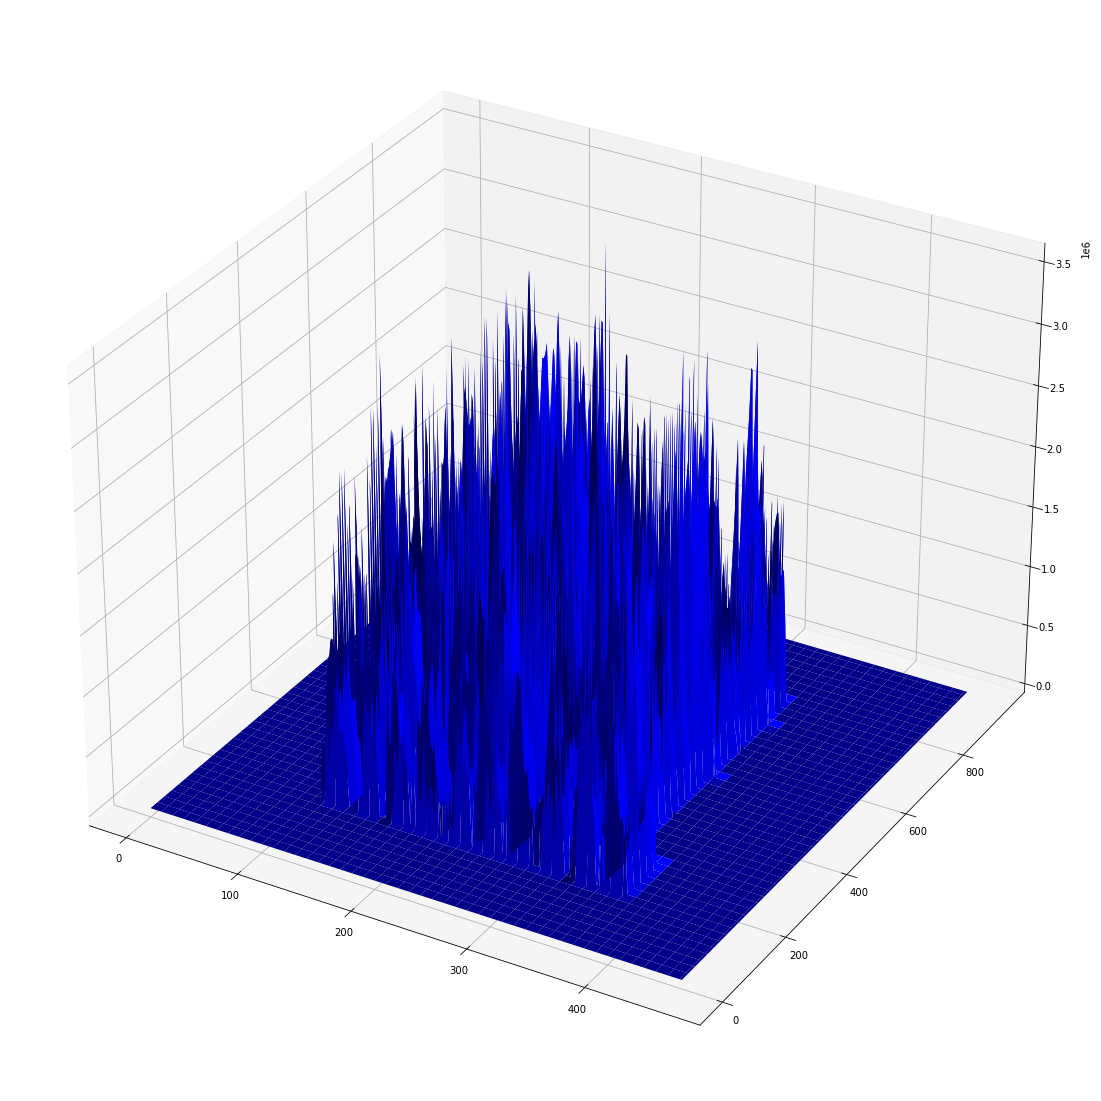

In [9]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, C, color='b')
plt.show()

Poszukuję maksimum i biorę wszystkie punkty większe od maksimum minus stała 250000 (obliczona na podstawie testów i oceniania wizualnie efektów). Dla tych punktów tworzę maskę czerwonych kwadratów które mają wyznaczać położenie liter e. Maksimum to prawy dolny róg takiego kwadratu.

In [10]:
count = 0
maximum = np.amax(C)
D = np.zeros_like(C)
mask = (C > maximum-1000)
for i, j in np.argwhere(mask):
    if np.all(D[i-13:i,j-13:j] == 0):
        count += 1
    D[i-13:i,j-13:j] = 255
    
print ("Znaleziono", count, "wystąpień wzorca.")

Znaleziono 43 wystąpień wzorca.


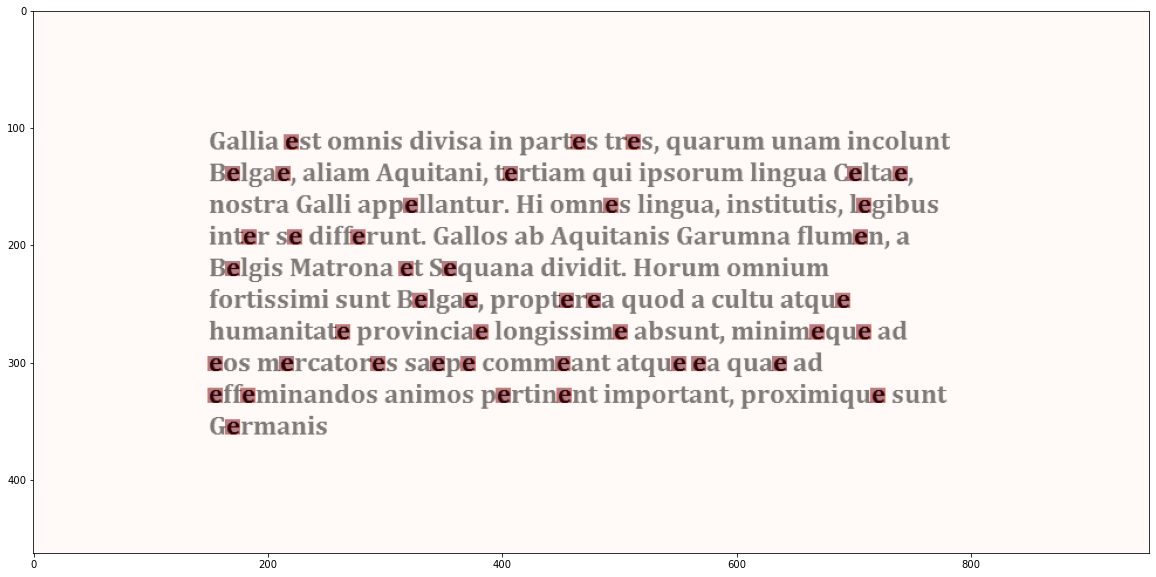

In [11]:
plt.figure (figsize=(20, 20))
plt.imshow(255 - galia, cmap='gray', alpha=1)
plt.imshow(D, cmap='Reds', vmin = 0, vmax = 255, alpha=0.5)
plt.show()

Udało się prawidłowo znaleźć wystąpienia litery 'e'.

## Ławica ryb

Wykonuję identyczne kroki jak wyżej dla obrazu ryb.

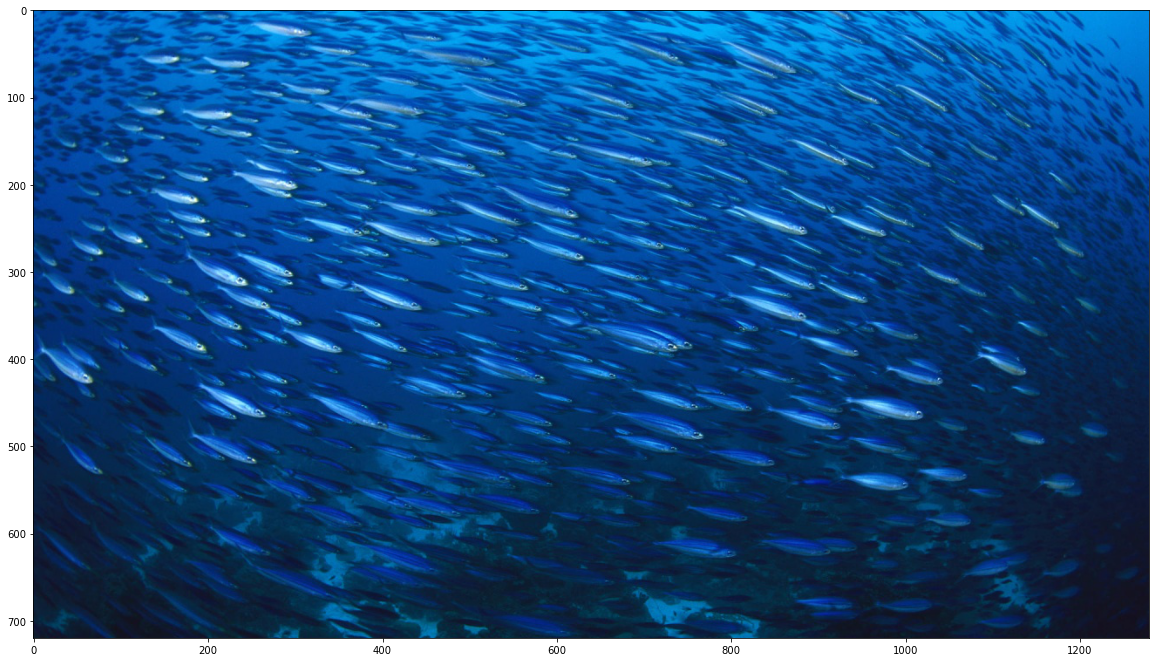

In [12]:
img = Image.open("school.jpg").convert("CMYK")
fishes = 255 - np.asarray(img)
plt.figure (figsize=(20, 20))
plt.imshow(fishes)
plt.show()

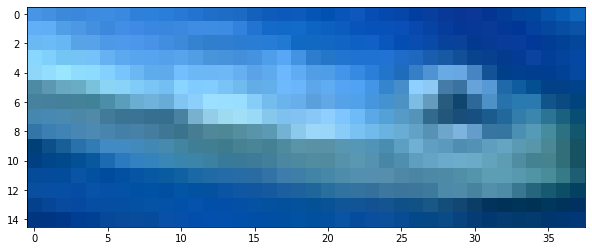

In [13]:
img = Image.open("fish1.png").convert("CMYK")
fish = 255 - np.asarray(img)
plt.figure (figsize=(10, 10))
plt.imshow(fish)
plt.show()

In [14]:
fft_fish = np.fft.fftn(np.rot90(fish, 2), s=fishes.shape)
fft_fishes = np.fft.fftn(fishes)
res = np.fft.ifftn(np.multiply(fft_fish, fft_fishes))
C = np.real(res)
C = np.sum(C, axis=2)

In [15]:
X = np.outer(np.arange(C.shape[0]), np.ones(C.shape[1]))
Y = np.outer(np.ones(C.shape[0]), np.arange(C.shape[1]))

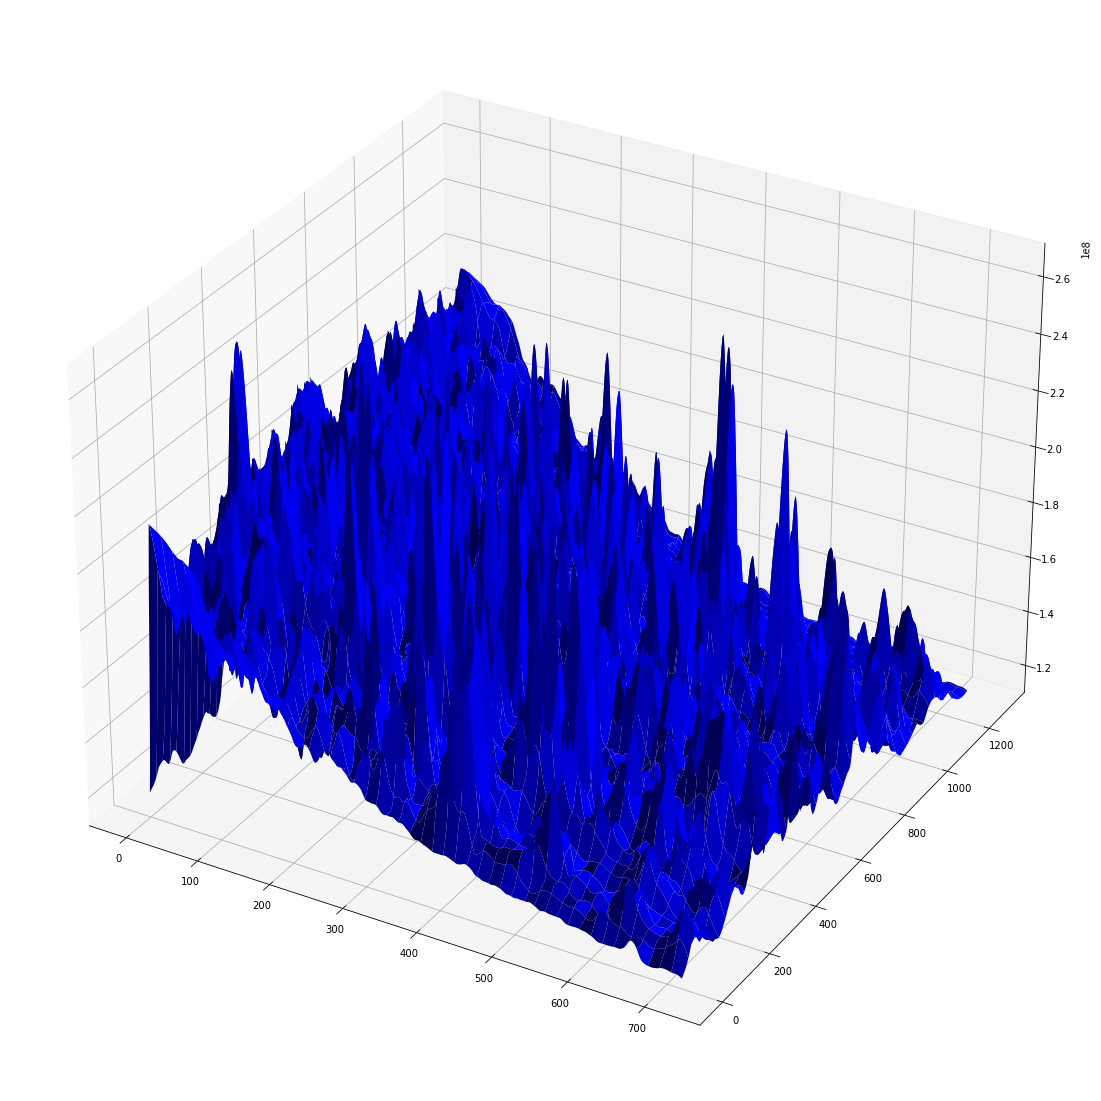

In [16]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, C, color='b')
plt.show()

Zauważam, że wykres wygląda różnie w zależności od jego części. WYnika to z faktu niejednostajnego oświetlenia obrazu. Z tego powodu decyduje się na szukanie wzorca w kolejnych fragmentach obrazu osobno, dzięki czemu znajduje wzorce które mają niższe maksimum ale są prawidłowe ze względu na inne oświetlenie obrazu. Po kilku testach decyduje na podział obrazu na 4 części poziome co też jest zgodne z otrzymanym powyżej wykresem.

In [17]:
count = 0
D = np.zeros_like(C, dtype=np.int64)
step_x = C.shape[0] // 4
step_y = C.shape[1] // 1
for s in range (0, C.shape[0], step_x):
    for t in range (0, C.shape[1], step_y):
        C_s = C[s:s+step_x, t:t+step_y]
        maximum = np.amax(C_s)
        mask = (C_s > maximum*0.77)
        for i, j in np.argwhere(mask)[::-1]:
            if np.all(D[i-15+s:i+s,j-38+t:j+t] == 0):
                count += 1
            D[i-15+s:i+s,j-38+t:j+t] = 255
    
print ("Znaleziono", count, "wystąpień wzorca.")

Znaleziono 3695 wystąpień wzorca.


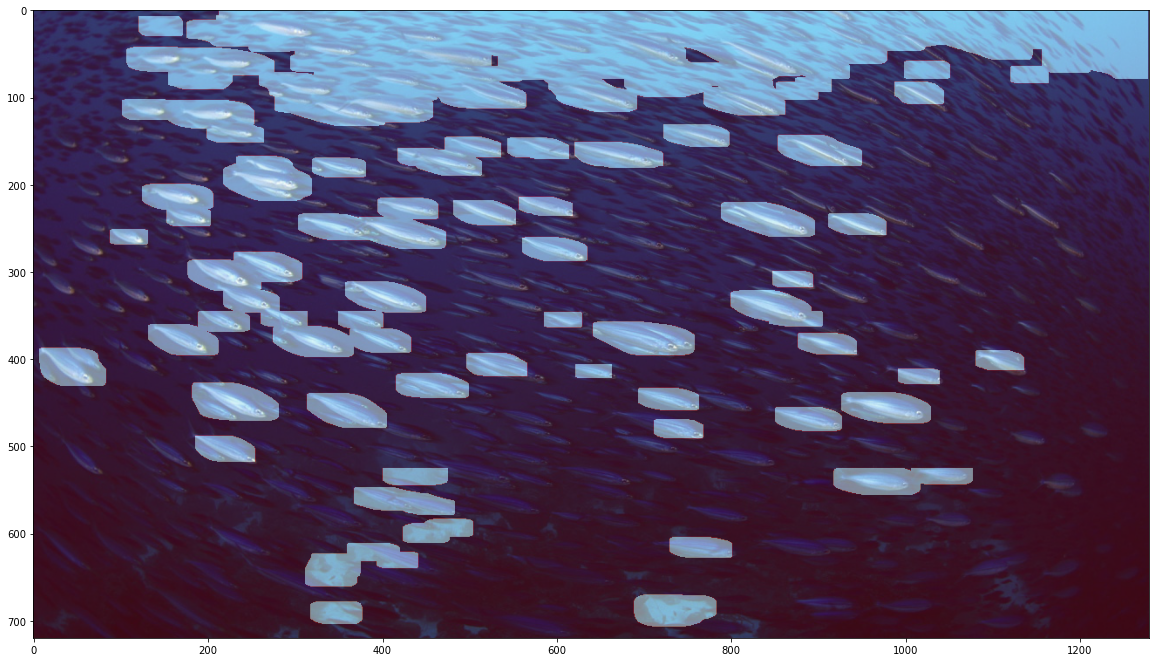

In [18]:
plt.figure (figsize=(20, 20))
plt.imshow(fishes, alpha=1)
plt.imshow(255-D, cmap='Reds', vmin = 0, vmax = 255, alpha=0.5)
plt.show()

Widzimy że znajdujemy dużo wartości prawidłowo lecz są też akceptacje tła. Wynika to z faktu spłaszczenia wykresu dla górnej częsci obrazu i jasne plamy tła w dolnej części. Ilość wyników zależy od ustawienia progu akceptacji znalezionego wzorca. Obniżając próg znajdujemy więcej prawidłowych wzorów ale też zaczynamy akceptować tło.

Możemy zauważyć, że ważne jest dobre określenie wzorca i tło bardzo inne niż wzorzec. Jesli wzorzec jest tylko podobny do tego co szukamy oraz tło ma fragmenty podobnych pikseli jak w przykładzie z rybami wyniki nie są w pełni zadawalające.

## OCR

Implementacja algorytmu OCR opartego o dyskretną tranformatę Fouriera

Wykonanie importów oraz stworzenie listy znaków zgodnie z wymaganiami zadania. Trzy czcionki używane do testów i tworzenia wzorców dla OCR.

In [2]:
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
import cv2 as cv
from scipy.ndimage import rotate as rt
from string import digits, ascii_lowercase
chars = ascii_lowercase + digits + "!?.,"

In [3]:
FONT_A = "AbyssinicaSIL-Regular.ttf"
FONT_S = "FreeSans.ttf"
FONT = "Sarai.ttf"

### Podstawowe funkcje

Funkcja obcinająca białe (czarne) tło dookoła tekstu. Pozostawia `r` lini tła. Służy do pozbycia się niepotrzebnego i niewnoszącego żadnej wartości tła. Kluczowa podczas budowania wzorców, które muszą posiadać jak najmniejszą otoczkę by "zmieścić" się w tekście.

In [4]:
def reduce_frame (arr, value=255, r = 1):
    if value == -1:
        value = arr[0,0]
    while len(arr) > r and np.all(arr[r,:] == value):
        arr = arr[1:,:]
    while len(arr) > r and np.all(arr[-r-1,:] == value):
        arr = arr[:-1,:]
    while len(arr[0]) > r and np.all(arr[:,r] == value):
        arr = arr[:,1:]
    while len(arr[0]) > r and np.all(arr[:,-r-1] == value):
        arr = arr[:,:-1]
    return arr

Funkcje redukujące szum. Używam pierwszej prostej, ponieważ testy przeprowadzane na sztucznie generowanych zdjęciach i szumie. Dla prawdziwych skanów funkcja wykorzystująca rozkład Gaussowski mogła by okazać się lepsza.

In [5]:
def make_threshold (matrix):
    _, thresh = cv.threshold(matrix, 127, 255, 0)
    #thresh = cv.adaptiveThreshold(matrix,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,2)
    return thresh

Funkcja tworząca obraz  zpodanym tekstem. Umożliwia wybór i rozmiar czcionki oraz dodanie szumu do zdjęcia. Szum pochodzi z rozkładu normalnego.

In [6]:
def make_picture (text, name="picture.png", font=FONT, size=20, noisy=False):
    text = text.lower()
    im = Image.new("L", (3000, 3000), 255)
    fnt = ImageFont.truetype(font, size)
    d = ImageDraw.Draw(im)
    d.multiline_text((10,10), text, font=fnt, fill=0)
    arr = np.asarray(im)
    arr = reduce_frame (arr, r=10)
    if noisy:
        arr = arr + np.random.normal(0, 1, arr.shape)
        arr = np.clip(arr, 0, 255)
    im = Image.fromarray(arr).convert('L')
    im.save(name)

Funkcja licząca korelację. Korzysta z fft oraz jest zbudowana zgodnie ze wzorem podanym na labolatorium.

In [7]:
def korelacja (matrix, pattern):
    return np.real (np.fft.ifftn(np.fft.fftn(np.rot90(pattern, 2), s=matrix.shape) * np.fft.fftn(matrix)))

Funkcja podsumowująca wynik poprzez zliczenie wystąpień kolejnych znaków. Zwraca słownik.

In [8]:
def count (text):
    result = {ch: 0 for ch in chars}
    for letter in "".join(text.split()):
        result[letter] += 1
    return result

Funkcja obliczająca kąt o jaki obrócony jest tekst. Funkcja działa prawidłowo dla lekkich przesunięć do 45 stopni. Jest to w zupełności wystarczające przy sytuacjach skanowania tekstu, gdzie takie obroty możemy obserwować. Korzystam z modułu open-cv. Kolejna funkcja obraca macierz o podany kąt. Skorzystałem z funkcji pochodzącej z modułu scipy.

In [9]:
def cal_angle (arr):
    coords = np.column_stack(np.where(arr > 0))
    angle = cv.minAreaRect(coords)[-1]
    if angle > 45:
        return 90 - angle
    return -angle
    
def rotate (arr, angle):
    return rt (arr, angle, reshape=False)

### Przygotowanie programu OCR

Funkcja budująca słownik ze wzorcami dla każdej litery. Wzorzec nie posiada ramki z tła dookoła siebie.

In [10]:
def make_lib (size=20, fonts=FONT):
    library = {}
    for ch in chars:
        im = Image.new("L", (200, 200), 255)
        fnt = ImageFont.truetype(fonts, size)
        d = ImageDraw.Draw(im)
        d.text((1,1), ch, font=fnt, fill=0)
        arr = make_threshold(255 - np.asarray(im))
        arr = reduce_frame(arr, value=0, r=0)
        library[ch] = arr
    return library

Tworzenie słownika z obliczoną korelacją dla każdego ze znaku.

In [11]:
def make_masks (matrix, lib):
    masks = {}
    for ch, pattern in lib.items():
        mask = korelacja(matrix, pattern)
        masks[ch] = mask
    return masks

Funkcja która zamienia tablicę zawierającą obraz na listę macierzy dla każdego słowa. Najpierw dzieli ona obraz na linie z tekstem, a następnie każdą linię dzieli na słowa. Uzyskujemy dzięki temu dwuwymiarową listę zawierającą macierze z fragmentami obrazu. Kluczowe jest zapewnienie, aby nie było szumu, ponieważ zakładamy, że tło jest jednolicie czarne.

In [12]:
def picture_to_matrix_words (arr, space=4):
    arr = reduce_frame(arr, 0)
    lines = []
    start = 0
    end = None
    for i, line in enumerate(arr):
        tmp = np.all(line==0)
        if end == None and tmp:
            start = i
        elif end == None and not tmp:
            end = -1
        elif tmp:
            end = i
            lines.append(arr[start:end+1])
            end = None
            start = i
        else:
            continue
    result = []
    for i, line in enumerate(lines):
        line = line.T
        words = []
        last = 0
        count = 0
        for j, column in enumerate(line):
            tmp = np.all(column==0)
            if tmp:
                count += 1
            else:
                count = 0
            if count >= space:
                new = line[last:j]
                words.append(reduce_frame(new.T, 0))
                count = -1000000
                last = j
        new = line[last:]
        if np.any(new==255):
            words.append(reduce_frame(new.T, 0))
        result.append(words)
    return result

Kluczowa funkcja tego programu. Otrzymuje ona słownik korelacji oraz słownik liter ze wzorcami. Zadaniem jej jest przerobienie macierzy zawierającej jeden obraz na słowo zapisane w formacie `str`. Funkcja przechodzi po literach od najszerszej do najwęższej poza przecinkiem i kropką, które są analizowane na końcu. Ma to na celu na przykład zapobieganie wpisaniu litery n w miejsce litery m. Dla każdego znaku sprawdzamy czy przekracza okreslony próg w którymś miejscu macierzy i wpisujemy go w macierzy wynikowej zgodnie z zasadmi które przedstawię później. Najpier sprawdzam czy jakiekolwiek maksimum przekracza dopasowanie wzorca do wzorca przemnożone przez stałą 0.92. Następnie biorę te punkty, które są ponad maksimum przemnożone przez stałą 0.98. Stałe zostały dobrane metodą prób i błędów. Wpisanie do macierzy wynikowej odbywa się tylko gdy w miejscu docelowym znajduje się wolne miejsce ('#') lub jest możliwe gdy znajduje się tam znak '\\$'. Znak '@' oznacza zajęte miejsce. Znak po wpisaniu zakreśla '@' zakres w którym się znajduje. Dookoła siebie natomiast tworzy otok ze znaków '\\$'. Jest to zabezpieczenie, gdyby inny znak chciał się tam wpisać później i wtedy porównujemy wartości z którą został wpisany dla obydwu tych liter, wybierając ten o wiekszej wartości. Na podstawie obserwacji zauważyłem że taka sytuacja nie ma miejsca ze względów na posortowanie elementów szukanych i odpowiednie zakreślanie miejsc. Jednakże została ona pozostawiona na wszelki wypadek, moze ona mieć znaczenie dla szumu, którego nie uda się odpowiednio usunąć.

In [13]:
def make_string (masks, lib, sortletter, sherif=True):
    s = 2 if sherif else 0        
    m1 = 0.92
    m2 = 0.975
    k = 1
    D = np.full_like(masks['a'], '#', dtype=str).copy()
    for letter in sortletter[:-2]:
        minimum = korelacja(lib[letter], lib[letter])
        minimum = minimum[-1, -1] * m1
        C = masks[letter]
        maximum = np.amax(C)
        if maximum < minimum: #żadna z wartości nie przekroczyła progu -> nie notujemy wystąpienia tej litery
            continue
        mask = (C >= maximum * m2)
        for i, j in np.argwhere(mask): #potencjalne wystąpienia litery
            if D[i,j] == '@': #pole na literę zajęte
                continue
            if D[i,j] == '#': #pole wolne
                D[i,j] = letter
            else: #pole zajęte przez inną literę ale podobną więc sprawdzam która pasuje bardziej
                ni, nj = i, j
                if D[i, j] == '$':
                    tmp = (D[i-k:i+k+1, j-k:j+k+1] == '$') + (D[i-k:i+k+1, j-k:j+k+1] == '#') + (D[i-k:i+k+1, j-k:j+k+1] == '@')
                    ar = np.argwhere(tmp == False)
                    if len(ar)>0:
                        x, y = ar[0]
                        ni = i+x-k
                        nj = j+y-k
                    else:
                        D[i, j] = letter
                        ni, nj = i, j
                old = D[ni, nj]
                if masks[old][ni, nj] < mask[i, j]:
                    D[i,j] = letter
                else:
                    i, j = ni, nj
            l = D[i, j]
            a, b = lib[l].shape
            D[i-a+2:i+1, j-b+1+s:j+1] = '@'
            D[i-k:i+k+1, j-k:j+k+1] = '$'
            D[i, j] = l
            #print (D)
    #zakładam, że przecinek i kropka w wyrazie mogą wystąpić tylko raz i na końcu co jest prawidłowym założeniem dla tekstu normalnego
    #założenie to poprawia wyniki lecz możemy łatwo się go pozbyć dodając kropkę i przecinek do powyższej pętli
    for letter in ",.": 
        minimum = korelacja(lib[letter], lib[letter])
        minimum = minimum[-1, -1] * m1
        C = masks[letter]
        maximum = np.amax(C)
        if maximum < minimum: #żadna z wartości nie przekroczyła progu -> nie notujemy wystąpienia tej litery
            continue
        mask = (C >= maximum * m2)
        arr = np.argwhere(mask)
        t = np.argmax(arr, axis=0)[-1]
        i, j = arr[t]
        if D[i,j] == '@' or D[i,j] == '$': #pole na literę zajęte
            continue
        if D[i,j] == '#': #pole wolne
            if np.all(D[:,j+1:] == '#'):
                D[i,j] = letter
                break
    word = ""
    for column in D.T:
        mask = ((column == '#') + (column == '$') + (column == '@'))
        if np.all(mask):
            continue
        l = column[mask == False][-1]
        word += l
    return word

### Główna funkcja

Funkcja ta korzysta z wcześniej zdefiniowanych funkcji w celu zmiany zdjęcia na tekst. Zwraca otrzymany tekst oraz słownik z podsumowujący wynik. Funkcja odczytuje obraz, odwraca kolory oraz obraca jeśli trzeba o kąt, a następnie po redukcji szumu dzieli go na listę słów. Buduje słownik wzorców i tworzy posortowane litery od najszerszej do najwęższej. Jako argumenty przyjmuje ścierzkę obrazu oraz parametry czcionki (rodzaj oraz rozmiar).

In [14]:
def OCR (filepath="galia.png", font = FONT, size=20, sherif=True):
    img = Image.open(filepath).convert("L")
    arr = 255 - np.asarray(img)
    arr = make_threshold(arr)
    angle = cal_angle(arr)
    if angle:
        arr = rotate(arr, angle)
        arr = make_threshold(arr)
        arr = reduce_frame(arr, value=0, r=10)
    lib = make_lib(size, font)
    tmp = sorted(list(lib.items()), key=lambda x: x[1].shape[1], reverse=True)
    sortletter = [l for l, _ in tmp if l not in ",."]
    sortletter.append(',')
    sortletter.append('.')
    matrix = picture_to_matrix_words (arr, size//4)
    result = ""
    for line in matrix:
        for i, word in enumerate(line):
            mask = make_masks(word, lib)
            if i != 0:
                result += " "
            result += make_string(mask, lib, sortletter, sherif)
        result += '\n'
    return result, count(result)

### Testy

Na test składa się stworzenie obrazu z tekstem oraz szumem, a następnie wywołanie OCR na tym tekście. Prezentowane są odpowiednie wizualizację. Do oceny jakości algorytmu wykorzystam odległość Levenshteina. Jest ona lepsza od sprawdzania poprawności znaków ponieważ stworzony przeze mnie program lubi wstawić dodatkową literę w środku wyrazu co znacznie utrudniało by rzetelną ocenę jakości.

#### Odległość Levenshteina

Odległość edycyjna. Możliwe zamiana, dodanie lub usunięcie znaku o koszcie 1. Jeśli pozostawiamy ten sam znak koszt 0. Implementacja wykorzystująca algorytm dynamiczny.

In [15]:
def simple_delta (x, y):
    if x == y:
        return 0
    return 1

def levenshtein_distance (text1, text2, delta = simple_delta):
    len1 = len(text1)
    len2 = len(text2)
    arr = np.zeros((len1+1, len2+1))
    for i in range(1, len1+1):
        arr[i, 0] = i
    for i in range(1, len2+1):
        arr[0, i] = i
    for i in range (1, len1+1):
        for j in range (1, len2+1):
            if arr[i-1, j] < arr[i, j-1]:
                val = arr[i-1, j] + 1
            else:
                val = arr[i, j-1] + 1
            d = delta (text1[i-1], text2[j-1]) + arr[i-1, j-1]
            if d < val:
                val = d
            arr[i, j] = val
    return arr[-1, -1]

#### Funkcja testująca

In [16]:
def test (text, font=FONT, size=20, noisy=False, sherif=True):
    text = text.lower()
    make_picture(text, "test.png", font, size, noisy)
    restext, summ = OCR("test.png", font, size, sherif)
    edit = levenshtein_distance (text, restext)
    img = Image.open("test.png").convert("L")
    im = np.asarray(img)
    plt.figure (figsize=(8, 8))
    plt.imshow(im, cmap='gray', vmin = 0, vmax = 255)
    plt.show()
    print ("Otrzymano następujący rezultat:\n")
    print (restext)
    print ("Odległość Levenshteina wynosi", edit)

#### Teksty wykorzystane do testów

Cztery teksty wykorzystane do testów. Każdy z nich zanim zostanie przetworzony ma zamienione duże litery na małe.

In [17]:
text1 = """Marcellus. Horatio says tis but our fantasy,
And will not let belief take hold of him
Touching this dreaded sight, twice seen of us.
Therefore I have entreated him along,
With us to watch the minutes of this night,
That, if again this apparition come,
He may approve our eyes and speak to it.
Horatio. Tush, tush, twill not appear.
Bernardo. Sit down awhile,
And let us once again assail your ears,
That are so fortified against our story,
What we two nights have seen.
"""

In [18]:
text2 = """First I call on you, Athena the immortal,
daughter of Zeus, and on your sister, too,
Artemis, who guards our land and sits
on her glorious round throne in our market place,
and on Phoebus, who shoots from far away.
O you three guardians against death,
appear to me!
If before now you have ever driven off
a fiery plague to keep disaster
from the city and have banished it,
then come to us this time as well!
"""

In [19]:
text3 = """LITHUANIA,  my  country,  thou  art  like  health,
how  much  thoushouldst be prized only he can learn who has lost thee.
To daythy beauty in all its splendour I see and describe, for I yearn forthee.
Holy Virgin, who protectest bright Czenstochowa and shinestabove the Ostra Gate in Wilno!
Thou who dost shelter the castleof Nowogrodek with its faithful folk!
"""

In [20]:
text4 = """The son of Duncan,
From whom this tyrant holds the due of birth
Lives in the English court, and is received
Of the most pious Edward with such grace
That the malevolence of fortune nothing
Takes from his high respect thither Macduff
Is gone to pray the holy king, upon his aid
To wake Northumberland and warlike Siward
That, by the help of these with Him above
To ratify the work we may again
Give to our tables meat, sleep to our nights,
Free from our feasts and banquets bloody knives,
Do faithful homage and receive free honours
All which we pine for now and this report
Hath so exasperate the king that he
Prepares for some attempt of war.
"""

#### Czcionka szeryfowa 'AbyssinicaSIL-Regular'

In [38]:
fnt = FONT_A
size = 30

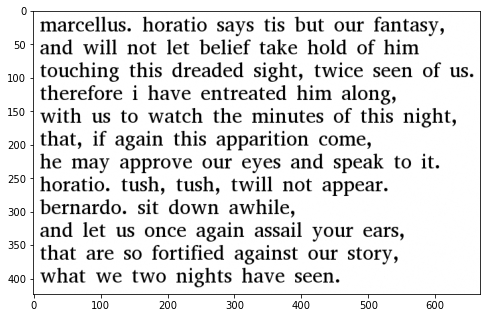

Otrzymano następujący rezultat:

marceiius. horatio says tis but our fantasy,
and will not iet belief take hoid of him
toucmg this dreaded sight, twice seen of us.
therefore i have entreated him aiong,
with us to watch the minutes of this mght,
that, if agam this apparition come,
he may approve our eyes and speak to it.
horatio. tush, tush, twill not appear.
bernardo. sit down awhile,
and iet us once agam assail your ears,
that are so fortified agamst our story,
what we two mghts have seen.

Odległość Levenshteina wynosi 19.0


In [39]:
test(text1, fnt, size, True)

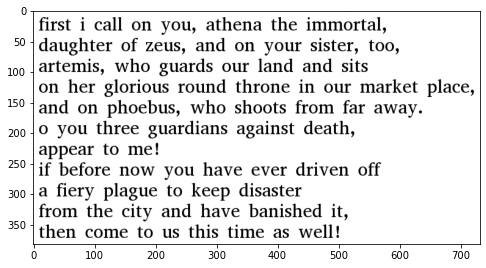

Otrzymano następujący rezultat:

first i caii on you, athena the immortal,
daughter of zeus, and on your sister, too,
artemis, who guards our iand and sits
on her glorious round trone m our market piace,
and on phoebus, who shoots from far away.
o you tree guardians agamst death,
appear to me!
if before now you have ever driven off
a fiery piague to keep disaster
from the city and have bamshed it,
then come to us this time as weii!

Odległość Levenshteina wynosi 15.0


In [40]:
test(text2, fnt, size, True)

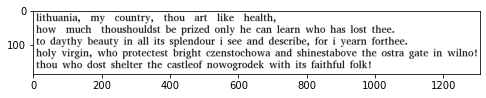

Otrzymano następujący rezultat:

lithuama, my country, thou art like heaith,
how much thoushouidst be prized oniy he can iearn who has iost thee.
to daythy beauty m aii its spiendour i see and describe, for i yearn forthee.
hoiy virgm, who protectest bright czenstochowa and smestabove the ostra gate m wino!
thou who dost sheiter the castieof nowogrodek with its faithful foik!

Odległość Levenshteina wynosi 32.0


In [41]:
test(text3, fnt, size, True)

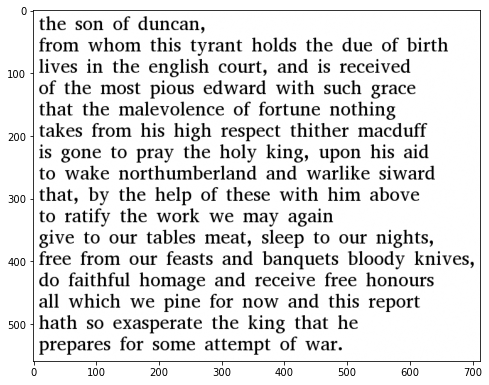

Otrzymano następujący rezultat:

the son of duncan,
from whom this tyrant hoids the due of birth
lives m the english court, and is received
of the most pious edward with such grace
that the maievoience of fortune notmg
takes from his high respect thither macduff
is gone to pray the hoiy kmg, upon his aid
to wake northumberiand and warlike siward
that, by the heip of these with him above
to ratify the work we may agam
give to our tabies meat, sieep to our mghts,
free from our feasts and banquets bioody kmves,
do faithful homage and receive free honours
aii which we pme for now and this report
hath so exasperate the kmg that he
prepares for some attempt of war.

Odległość Levenshteina wynosi 28.0


In [42]:
test(text4, fnt, size, True)

#### Czcionka szeryfowa 'Sarai'

In [43]:
fnt = FONT
size = 30

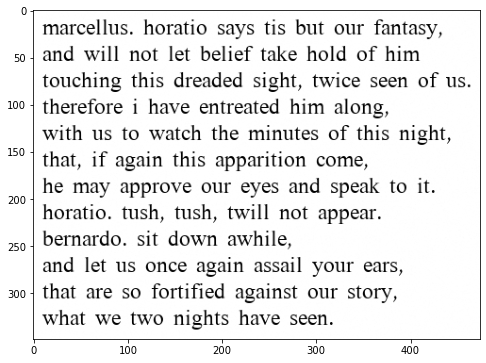

Otrzymano następujący rezultat:

marce!i!ius. horatio says tis but our fatasy,
andi w!i!i not !iet be!ief take ho!id of him
touching this direadiedi sigt, twice seen of us.
therefore i have entreatedi him aiong,
with us to watch the minutes of this nigt,
that, if again this appartion come,
he may approve our eyes andi speak to it.
horatio. tush, tush, twi!i!i not appear.
bernardio. sit diown awhiie,
andi !iet us once again assa!i your ears,
that are so fortified against our story,
what we two nights have seen.

Odległość Levenshteina wynosi 35.0


In [44]:
test(text1, fnt, size, True)

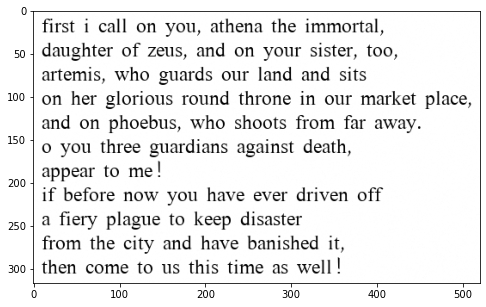

Otrzymano następujący rezultat:

first i ca!i!i on you, athena the immortai,
daughter of zeus, andi on your sister, too,
artemis, who guards our !iand andi sits
on her giorious roundi trone in our market piace,
andi on phoebus, who shoots from far away.
o you three guardians against death,
appear to me !i
if before now vou have ever driven off
 
a fiery piague to keep disaster
from the city andi have banished it,
then come to us this time as we!i!i !i

Odległość Levenshteina wynosi 27.0


In [45]:
test(text2, fnt, size, True)

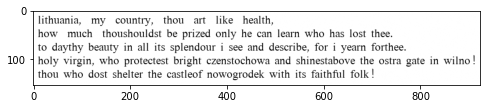

Otrzymano następujący rezultat:

iithuana, my country, thou art !iike heaith,
how much thoushou!idst be prized oniy he can !iearn who has !iost thee.
to daythy beauty in a!i!i its spiendour i see andi describe, for i yearn forthee.
hoiy vrgin, who protectest bright czenstochowa andi shinestabove the ostra gate in wi!ino !i
thou who diost she!iter the cast!ieof nowogrodek with its faithfu!i fo!ik !i

Odległość Levenshteina wynosi 43.0


In [46]:
test(text3, fnt, size, True)

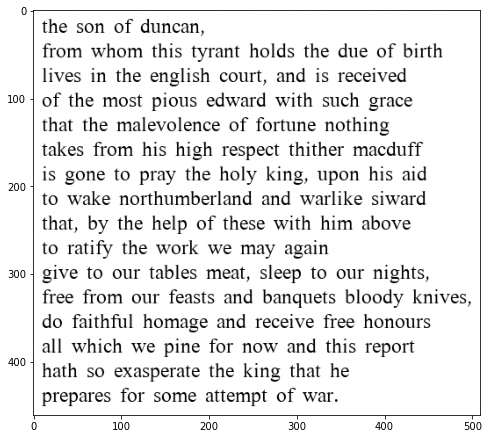

Otrzymano następujący rezultat:

the son of duncan,
from whom this tvrat ho!ids the diue of birth
 
!iives in the engiish court, andi is receivedi
of the most pious ediwardi with such grace
that the ma!ievo!ience of fortune nothing
takes from his high respect thither macdiuff
is gone to pray the hoiy king, upon his aid
to wake northumber!iand andi war!ike siward
that, by the heip of these with him above
to ratify the work we may again
give to our tab!ies meat, sieep to our nigts,
free from our feasts andi banquets bioody knives,
dio faithfu!i homage andi receive free honours
a!i!i which we pine for now andi this report
hath so exasperate the king that he
prepares for some attempt of war.

Odległość Levenshteina wynosi 40.0


In [47]:
test(text4, fnt, size, True)

#### Czcionka bezszeryfowa 'FreeSans'

In [21]:
fnt = FONT_S
size = 20

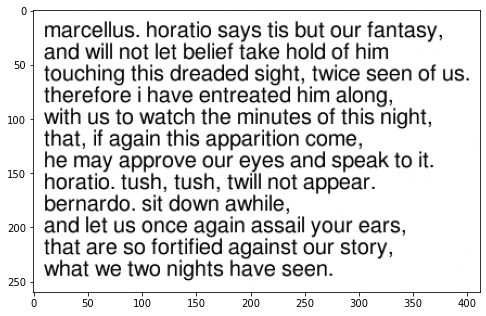

Otrzymano następujący rezultat:

marceiius. horatio says tis but our fantasy,
and wiii not iet beiief take hoid of him
touching this dreaded sight, twice seen of us.
therefore i have entreated him aiong,
with us to watch the minutes of this night,
that, if again this apparition come,
he may approve our eyes and speak to t.
horatio. tush, tush, twiii not appear.
bernardo. st down awhiie,
and iet us once again assaii your ears,
that are so fortified against our story,
what we two nights have seen.

Odległość Levenshteina wynosi 15.0


In [22]:
test(text1, fnt, size, True, False)

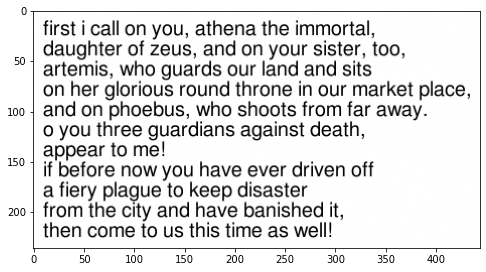

Otrzymano następujący rezultat:

first i caii on you, athena the immortai,
daughter of zeus, and on your sister, too,
artemis, who guards our iand and sts
on her giorious round throne in our market piace,
and on phoebus, who shoots from far away.
o you three guardians against death,
appear to me!
if before now you have ever driven off
a fiery piague to keep disaster
from the cty and have banished it,
then come to us this time as weii,

Odległość Levenshteina wynosi 12.0


In [50]:
test(text2, fnt, size, True, False)

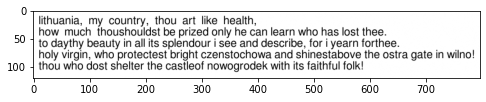

Otrzymano następujący rezultat:

iithuania, my country, thou art iike heaith,
how much thoushouidst be prized oniy he can iearn who has iost thee.
to daythy beauty in aii ts spiendour i see and describe, for i yearn forthee.
hoiy virgin, who protectest bright czenstochowa and shinestabove the ostra gate in wiino!
thou who dost sheiter the castieof nowogrodek with ts faithfui foik.

Odległość Levenshteina wynosi 27.0


In [51]:
test(text3, fnt, size, True, False)

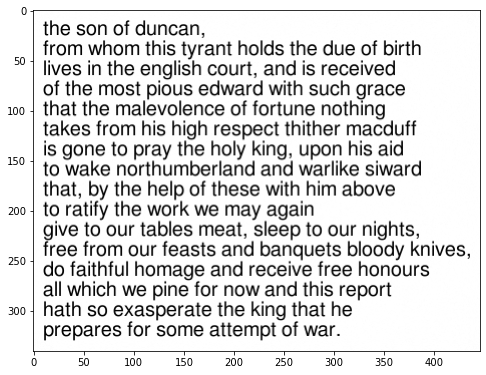

Otrzymano następujący rezultat:

the son of duncan,
from whom this tyrant hoids the due of birth
iives in the engiish court, and is received
of the most pious edward with such grace
that the maievoience of fortune nothing
takes from his high respect thither macduff
is gone to pray the hoiy king, upon his aid
to wake northumberiand and wariike siward
that, by the heip of these with him above
to ratify the work we may again
give to our tabies meat, sieep to our nights,
free from our feasts and banquets bioody knives,
do faithfui homage and receive free honours
aii which we pine for now and this report
hath so exasperate the king that he
prepares for some attempt of war.

Odległość Levenshteina wynosi 15.0


In [52]:
test(text4, fnt, size, True, False)

Na podstawie powyższych tekstów możemy zauważyć, że algorytm w miarę sobie radzi z odczytem tekstu ze zdjęcia. Na początku mojej pracy dużo lepiej działał dla czcionki szeryfowej. Co było spowodowane tym, że litery są bardziej odróżnialne od siebie. Jednakże po zmianie parametrów m1 i m2 w funkcji `make_string` wyniki się wyrównały dla wszystkich czcionek. Dla czcionki bezszeryfowej często występują następujące problemy. Np i jest mylone z l (różnią się one tylko kilkoma pikselami pomiędzy kropką a kreską w i). Pojawiają sie też dodatkowe litery przed inną, np. i przed h. Jest to trudne do wyeliminowania, ponieważ z jednej strony możemy całkiem zablokować miejsce, ale z drugiej przy niewielkich odstępach może zacząć brakować literek ponieważ zablokujemy miejsce na inną literę. Jest to szczególnie widoczne dla czcionek szeryfowych, gdzie często literki są bardzo blisko siebie, co jest spowodowane ogonkami. Problemem, może być również szum, który znikształca miejsca wykrycia literek. Aby przeciwdziałać złym sytuacjom dla szeryfowego tekstu zwiększam wtedy pozostawiany odstęp przed literką o 2 piksele.

Otzrymane wyniki dla czcionki szeryfowej mogą być lepsze poprzez zwiększenie parametrów m1 i m2. Jednakże wtedy nie jesteśmy w stanie odczytać czegokolwiek z tekstu ze zniekształconymi literami. Takie parametry to kompromis dający dobre wyniki dla wielu sytuacji.

#### Obrócone zdjęcie

Następnie pokażę działanie funkcji obracającej tekst. Poprzednie testy były przeprowadzone bez obrotów, aby nie komplikować sytuacji. Poniżej pokażę że same obroty działają prawidłowo.

In [53]:
text5 = """In nomine patris
et filii
et spiritus sancti.
Amen
"""

Obrót o 6 stopni.

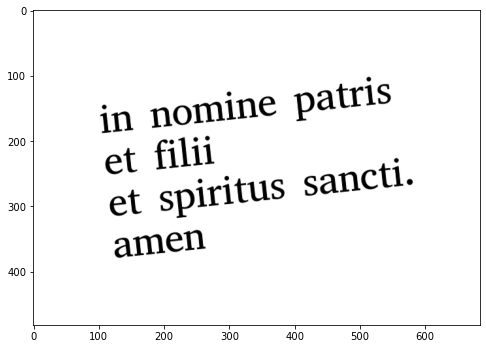

Wykryto obrót o -5.988148212432861 stopni


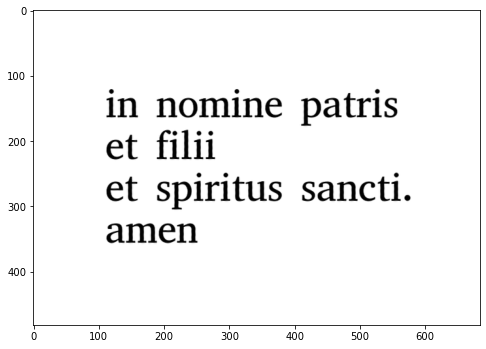

In [54]:
#tworzenie obrazu
text = text5.lower()
im = Image.new("L", (3000, 3000), 255)
fnt = ImageFont.truetype(FONT_A, 60)
d = ImageDraw.Draw(im)
d.multiline_text((1000,1000), text, font=fnt, fill=0)
arr = np.asarray(im)
arr = rotate (255-arr, 6)
arr = reduce_frame(255-arr, r=100)
im = Image.fromarray(arr).convert('L')
im.save("rotate1.png")

#odczyt obrazu
img = Image.open("rotate1.png").convert("L")
im = np.asarray(img)
plt.figure (figsize=(8, 8))
plt.imshow(im, cmap='gray', vmin = 0, vmax = 255)
plt.show()

#prostowanie obrazu
angle = cal_angle(255-im)
print ("Wykryto obrót o", angle, "stopni")
if angle:
    im = rotate(255-im, angle)
plt.figure (figsize=(8, 8))
plt.imshow(255-im, cmap='gray', vmin = 0, vmax = 255)
plt.show()

Obrót o -20 stopni.

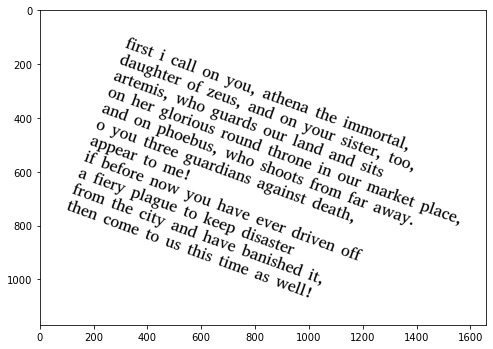

Wykryto obrót o 20.00543212890625 stopni


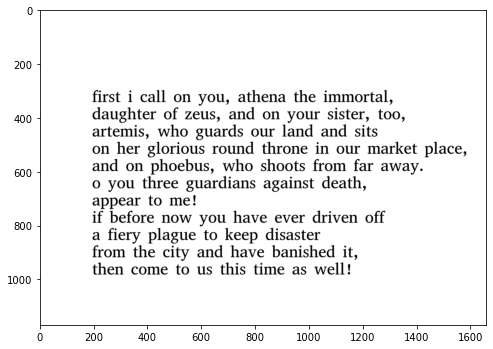

In [55]:
#tworzenie obrazu
text = text2.lower()
im = Image.new("L", (3000, 3000), 255)
fnt = ImageFont.truetype(FONT_A, 60)
d = ImageDraw.Draw(im)
d.multiline_text((1000,1000), text, font=fnt, fill=0)
arr = np.asarray(im)
arr = rotate (255-arr, -20)
arr = reduce_frame(255-arr, r=100)
im = Image.fromarray(arr).convert('L')
im.save("rotate.png")

#odczyt obrazu
img = Image.open("rotate.png").convert("L")
im = np.asarray(img)
plt.figure (figsize=(8, 8))
plt.imshow(im, cmap='gray', vmin = 0, vmax = 255)
plt.show()

#prostowanie obrazu
angle = cal_angle(255-im)
print ("Wykryto obrót o", angle, "stopni")
if angle:
    im = rotate(255-im, angle)
plt.figure (figsize=(8, 8))
plt.imshow(255-im, cmap='gray', vmin = 0, vmax = 255)
plt.show()

OCR dla krzywego tekstu.

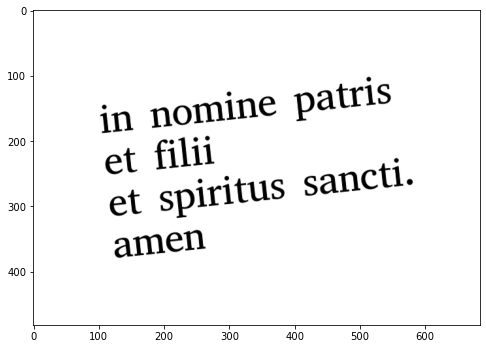

Otrzymano następujący rezultat:

in nomine pats
e fiii
e spirius sani
amen

Odległość Levenshteina wynosi 9.0


In [56]:
text = text5.lower()
restext, summ = OCR("rotate1.png", FONT_A, 60, True)
edit = levenshtein_distance (text, restext)
img = Image.open("rotate1.png").convert("L")
im = np.asarray(img)
plt.figure (figsize=(8, 8))
plt.imshow(im, cmap='gray', vmin = 0, vmax = 255)
plt.show()
print ("Otrzymano następujący rezultat:\n")
print (restext)
print ("Odległość Levenshteina wynosi", edit)

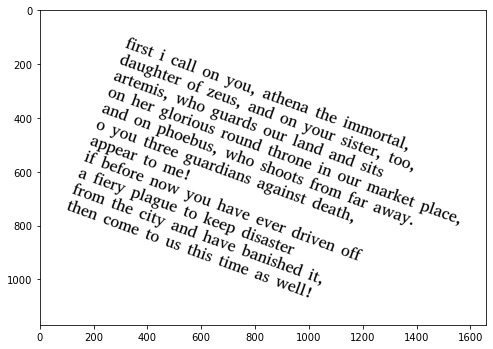

Otrzymano następujący rezultat:

irt i call on you, atlhna tlh immortal,
lauglht of zu. land on you itr, too,
artmi, wlho guals our lland lnd it
on lher gloriou lround tlhrone in our marlkt plac,
land on iplhobu, wlho slhoots from far away
o ou tlh guarlian aaint ltlh,
appa to m.
if lbefore now you lha eer lrin off
a ir iplagu to lkp liate
fom tlh cit land lha banilhd it,
tlhn com to u tlhi tim a wll!.

Odległość Levenshteina wynosi 99.0


In [57]:
text = text2.lower()
restext, summ = OCR("rotate.png", FONT_A, 60, False)
edit = levenshtein_distance (text, restext)
img = Image.open("rotate.png").convert("L")
im = np.asarray(img)
plt.figure (figsize=(8, 8))
plt.imshow(im, cmap='gray', vmin = 0, vmax = 255)
plt.show()
print ("Otrzymano następujący rezultat:\n")
print (restext)
print ("Odległość Levenshteina wynosi", edit)

Jak widać dla powyższych testów, krzywo zeskanowany tekst jest prawidłwowo obracany. Jednakże obroty zniekształacają litery przez co otrzymujemy gorszy wynik jednakże udaje się odczytać tekst. Pomaga użycie dużej czcionki.